# Exploration into TMBD Movies Dataset

## ----Importing Necessary Libraries----

In [2]:
import os ## This module was used to check the current working directory during data loading.
import pandas as pd ## This module is used to manipulate and load data.
import numpy as np ## This module is used to generate summary statistics and apply mathematics functions to data.
import matplotlib.pyplot as plt ## Used to generate a window for visuals to be displayed within this notebook.
import seaborn as sns ## This module is used to generate visuals including histograms and correlation plots.
import ast ## This module can be used to evaluate literals, eg: transform string-lists back into lists.

## ----Loading the data----

#### Directory Check

In [13]:
# CHECKING THE CURRENT WORKING DIRECTORY IS CORRECT.
## Make sure the notebook is working from the same folder as the dataset
notebook_path = os.getcwd()
print(notebook_path)

C:\Users\Harry\Desktop\Digital Futures\TMBD Assignment


#### Load dataset csv into a pandas dataframe

In [316]:
#INITIALISE A VARAIBLE REPRESENTING THE PATH FOR THE DATASET
## As the notebook is already in the same directory as the dataset, the full path is not required
## to access the dataset.
dataset = 'TMDB_movies.csv'

In [317]:
#READ THE DATASET INTO A PANDAS DATAFRAME (df)
df = pd.read_csv(dataset)

## ----First Checks----

### <span style = "color:#E66100"> Questions: </span>

#### <span style = "color:#0C7BDC"> Solved: </span> In **production_countries & spoken_languages** what does the **<i>"iso_"</i>** prefix refer to?

ISO are standards defined by the ***International Organisation for Standardization (ISO)***
- **ISO 3166** is a standard for defining codes representing the names of countries.
- **ISO 639** is a standard for defining codes representing the names of languages.

#### <span style = "color:#0C7BDC"> Solved: </span> How do I map original languages?

Original Language abbreviations seems to be mapped to ISO 3166 standards.
https://www.iso.org/iso-3166-country-codes.html

#### <span style = "color:#0C7BDC"> Solved: </span>  Expanding overview, what does it consist of?

Description of the movie/blurb.

In [214]:
df2['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

#### <span style = "color:#0C7BDC"> Solved: </span> What is the difference between "Original Title" and "Title"?

Are there any entries where these two values do not match?
- Yes, 261 entries.
- Usually a translation or the same title with more context.

In [216]:
len(df2[df2['original_title'] != df2['title']])

261

In [221]:
df2[df2['original_title'] != df2['title']][['title','original_title']].head()

,title,original_title
97,Shin Godzilla,シン・ゴジラ
215,Fantastic 4: Rise of the Silver Surfer,4: Rise of the Silver Surfer
235,Asterix at the Olympic Games,Astérix aux Jeux Olympiques
317,The Flowers of War,金陵十三釵
474,Evolution,Évolution


#### <span style = "color:#E66100"> Unsolved: </span> What does **popularity** reference?

#### <span style = "color:#E66100"> Unsolved: </span> How are votes calculated? What is good, what is bad?

##### <span style = "color:#0C7BDC"> **Code** </span>

In [28]:
# CHECK THE FIRST 5 ROWS OF DATA
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Self-Made Dictionary

###### <u>**Key:**</u> 
- Orange datatypes are the same in the data,
- Non-orange datatypes are representeed as **objects** in the dataframe and <i>might require conversion</i>.

**Budget:** <i> USD($) Budget for each film's production </i> <span style = "color:orange"> **(int)** </span>.
    
- <span style = "color:green"> **?** </span> Maybe rounded to the nearest dollar/whole currency <span style = "color:green"> **?** </span>

**Genres:** <i> List of genres </i> **(str)**. 
- Each genre represented by a dictionary **(dict)**.
- Each dictionary has a key for "<i>[unique genre]</i> id" **(int)** and "<i>[genre]</i> name" **(str)**. 
- **List is represented as a string.**
        
**Homepage:** <i>URL of the movie landing page </i>**(str)**.

**Id:** <i>Unique identifier for each entry in the dataset <span style = "color:orange"> </i>**(int)** </span>.

**Keywords:** <i>List of keywords in the same format as genres</i> **(lst)**.
- Potentially kewords and genres are from the same data set due to
  format similarity and keywords IDs are far larger than genre IDs.
          

**Original Language:** <i>Two lower case letters representing language</i> **(str)**.
- **"en" == English**
- **"es" == ?**

**Original Title:** <i>The Title of the Film </i>**(str)**.
- Potentially in the original language...

**Overview:** <i>A synopsis of the film's plot </i>**(str)**. 

**Popularity:** <i>No idea!  </i> <span style = "color:orange"> **(float)** </span>.

**Production Companies:** <i>List of the production companies involved with the film </i>**(str)**.
- Each company represented by a dictionary **(dict)**.
- Each dictionary has a key for "<i>[company]</i> name" **(str)** and "<i>[unique company]</i> id" **(int)**.

**Production Countries:** <i>List of the countries involved with the production of the film</i> **(str)**.
- Each country represented by a dictionary **(dict)**.
- Each dictionary has a key for "<i>[country]</i> abbreviation" **(str)** and "<i>[country]</i> name" **(str)**.
    - Country abbreviation == **"iso_3166_1."**

**Release date:** <i>The date of the film's release.</i>
- Assumed datatype: **date.time**
- Format: **YYYY-MM-DD**

**Revenue:** <i> USD($) revenue for each film's production </i>**(int)**.

- <span style = "color:green"> **?** </span> Maybe rounded to the nearest dollar/whole currency <span style = "color:green"> **?** </span>

**Runtime:** <i> The runtime in minutes of each film  </i> <span style = "color:orange"> **(float)** </span>.

**Spoken languages:** <i>List of every available language option for a given film</i> **(str)**.
- Each language represented by a dictionary **(dict)**.
- Each dictionary has a key for "<i>[unique language]</i> id" **(str)** and "language" **(str)**. 
     - Language abbreviation == **"iso_639_1."**

**Status:** <i>A boolean, whether or not the film has been released</i> **(str)**.
- **True == "released"**
- **False == ""**

**Tagline:** <i>A string representing the tagline for the movie</i> **(str)**.

**Title:** <i>The Title of the Film </i>**(str)**.

- <span style = "color:green"> **?** </span> Maybe different from the <i>original title</i> <span style = "color:green"> **?** </span>

**Vote Average:** <i>Average (likely mean) of all of the votes for a given film</i> <span style = "color:orange"> **(float)** </span>.

**Vote Count:** <i>A tally of the total amount of votes in the dataset per film</i> <span style = "color:orange"> **(int)** </span>.


## ----Data Quality Checks----

### Data Overview

#### <span style = "color:#E66100"> **Insights** </span>

- **4803 rows** (movies entered).
- **20 columns** (categories of data) for each obs.
- Can't confirm all of our datatype assumptions.
    - <i>All known data types are **orange in the dictionary**. </i>
    - <i>Other datatypes might need conversion prior to analysis.</i>
- Null values are present in tagline (3959), runtime (4801), homepage (1712), overview (4800) and the release_date (4802) columns.


##### <span style = "color:#0C7BDC"> **Code** </span>

In [27]:
# USE pandas.info TO GAIN INSIGHT INTO EACH COLUMN
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [26]:
# USE pandas.describe TO GAIN INSIGHT INTO...
df.describe

<bound method NDFrame.describe of          budget                                             genres  \
0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...         ...                                                ...   
4798     220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4799       9000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
4800          0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
4801          0                                                 []   
4802          0                [{"id": 99, "name": "Documentary"}]   

                                               homepage      id  \
0                           http://www.avatarmovie.com/   

### <span style = "color:#E66100"> Addressing Gaps in the Data </span>

#### <span style = "color:#E66100"> **Insights** </span>

<u>Before Changes:</u>
**# Rows Missing Data:** 3310

**# Rows Missing Data Per Column:**
- **homepage:** 3091 
- **overview:** 3
- **release_date:** 1
- **runtime:** 2
- **tagline:** 844

<u>After Changes:</u>
**# Rows Missing Data:** 3395

**# Rows Missing Data Per Column:**
- **genres:** 27
- **homepage:** 3090 
- **keywords:** 411 
- **overview:** 3
- **production_companies:** 350
- **production_countries:** 173
- **spoken_languages:** 85
- **release_date:** 0
- **runtime:** 0
- **tagline:** 843

#### <span style = "color:#E66100"> **Actions Taken** </span>

- **Nulls** in homepage, <u>tagline, overview, spoken_languages, genres, keywords, production_companies and production_countries </u> left.
    - **This data could be collected** from internet sources, potentially by webscraping. However, this is outside the scope 
    of this analysis.
- **Entry 2656:** <i>Runtime for "Chiamatemi Francesco - Il Papa della gente" was entered manually - **id:** 370980</i>
    - 96 minutes, **Source:** https://www.imdb.com/title/tt3856124/ 
- **Entry 4140:** <i>Runtime for "To Be Frank, Sinatra at 100 was entered manually - **id:** 459488</i>
    - 81 minutes, **Source:** https://www.imdb.com/title/tt4"704314/
- **Entry 4553:** <i>"America is Still the Place" removed and considered outlier - **id:** 380097</i>
    - Released but no release date.
    - No budget.
    - No genres.
    - No votes.
- Columns that contained null values represented differently were converted to null using np.nan.
    -I.e. a lack of data in **keywords** is represented as the following string **"[]"**.

##### <span style = "color:#0C7BDC"> **Code** </span>

###### Checks: Prior to replacing '[]' with np.nan

In [48]:
# Generate a copy of the original dataframe to manipulate and analyse.
# df2 = df.copy()

In [49]:
# RETURN EVERY OBSERVATION CONTAINING A NULL VALUE
# missing_values = df2[df2.isnull().any(axis=1)]

In [50]:
#COUNT THE TOTAL NUMBER OF ENTRIES CONTAINING A MISSING VALUE
# len(missing_values)

3310

In [51]:
#COUNTING NULLS PER COLUMN
# df2.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [60]:
#INSPECT NULL VALUES per COLUMN
column = 'release_date'
df2[df2[column].isnull()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaN,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0


###### Checks: After replacing '[]' with np.nan

In [162]:
missing_values = df2[df2.isnull().any(axis=1)]
len(missing_values)

3395

In [181]:
df2.isnull().sum()

budget                     0
genres                    27
homepage                3090
id                         0
keywords                 411
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies     350
production_countries     173
release_date               0
revenue                    0
runtime                    0
spoken_languages          85
status                     0
tagline                  843
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [170]:
#INSPECT NULL VALUES per COLUMN
column = 'keywords'
df2[df2[column].isnull()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
71,145000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",http://www.themummy.com/,1735,NaN,en,The Mummy: Tomb of the Dragon Emperor,"Archaeologist Rick O'Connell travels to China,...",60.034162,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2008-07-01,401128639,112.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,A New Evil Awakens.,The Mummy: Tomb of the Dragon Emperor,5.2,1387
83,27000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,79698,NaN,en,The Lovers,The Lovers is an epic romance time travel adve...,2.418535,"[{""name"": ""Corsan"", ""id"": 7299}, {""name"": ""Bli...","[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}, {""...",2015-02-13,0,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Love is longer than life.,The Lovers,4.8,34
323,100000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.sexandthecitymovie.com/,37786,NaN,en,Sex and the City 2,"Carrie, Charlotte, and Miranda are all married...",18.325897,"[{""name"": ""New Line Cinema"", ""id"": 12}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-05-26,288347692,146.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Carrie on.,Sex and the City 2,5.4,426
381,90000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.nutcrackerin3d.com/,49852,NaN,en,The Nutcracker: The Untold Story,"Set in 1920's Vienna, this a tale of a little ...",3.593349,"[{""name"": ""Vnesheconombank"", ""id"": 24013}, {""n...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2010-11-24,16178959,110.0,"[{""iso_639_1"": ""da"", ""name"": ""Dansk""}, {""iso_6...",Released,NaN,The Nutcracker: The Untold Story,5.4,50
436,80000000,"[{""id"": 35, ""name"": ""Comedy""}]",http://www.sonypictures.com/movies/grownups2,109418,NaN,en,Grown Ups 2,The all-star comedy cast from Grown Ups return...,45.589568,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-07-11,246984278,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Just because they're a little older doesn't me...,Grown Ups 2,5.8,1155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4790,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10769, ""n...",NaN,13898,NaN,fa,دایره,Various women struggle to function in the oppr...,1.193779,"[{""name"": ""Jafar Panahi Film Productions"", ""id...","[{""iso_3166_1"": ""IR"", ""name"": ""Iran""}]",2000-09-08,0,90.0,"[{""iso_639_1"": ""fa"", ""name"": ""\u0641\u0627\u06...",Released,NaN,The Circle,6.6,17
4794,0,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 27, ""n...",NaN,286939,NaN,en,Sanctuary: Quite a Conundrum,"It should have been just a normal day of sex, ...",0.166513,"[{""name"": ""Gold Lion Films"", ""id"": 37870}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-01-20,0,82.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Sanctuary: Quite a Conundrum,0.0,0
4797,0,"[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",NaN,67238,NaN,en,Cavite,"Adam, a security guard, travels from Californi...",0.022173,NaN,NaN,2005-03-12,0,80.0,NaN,Released,NaN,Cavite,7.5,2
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,NaN,NaN,2011-12-26,0,85.0,NaN,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5


###### Action: Remove Outlier 4553

In [81]:
#REMOVE OUTLIER 4553 - "America is Still the Place" ###Source: https://saturncloud.io/blog/how-to-remove-rows-with-specific-values-in-pandas-dataframe/#:~:text=Method%202%3A%20Using%20the%20drop,value%20we%20want%20to%20remove.
outlier = df2[df2['id'] == 380097].index
len(df2.drop(outlier, axis=0))

4802

In [83]:
#OUTPUT LOOKS GOOD- FINALISE CHANGES
df2.drop(outlier, axis=0, inplace=True)

###### Action: Convert all missing data to null

In [165]:
# IDENTIFY MISSING VALUES THAT ARE NOT REPRESENTED BY NULL.

In [167]:
## Identify what datatype represents this missing data object by grabbing an example from the data set
example = df2[df2['id'] == 67238]['keywords'][4797]

In [158]:
type(example)

str

In [159]:
example

'[]'

In [166]:
# APPLY THE CONVERSION
df2.replace(example,np.nan,inplace=True)

###### Action: Convert runtime for 2656 and 4140

In [179]:
#CONVERT Chiamatemi Francesco RUNTIME FROM NAN TO 96 MINUTES
df2.loc[2656,'runtime'] = 96

In [180]:
#CONVERT Frank Sinatra RUNTIME FROM NAN TO 96 MINUTES
df2.loc[4140,'runtime'] = 81

### Are there any duplicates?

No duplicates found.

##### <span style = "color:#0C7BDC"> **Code** </span>

In [182]:
#CHECK # OF UNIQUE VALUES Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html
df2[df2.duplicated()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count


### <span style = "color:#E66100"> **Outlier Check** </span>

#### <span style = "color:#E66100"> **Insights and Inconsistencies** </span>

- **Large spread but low variance** of budgets and revenues in the data, with the trend being towards 0.
    - **Mean**
        - Budget: **~4.1**
        - Revenue: **~1.2**
    - **Standard Deviation**
        - Budget: **~4.4**
        - Revenue: **~1.9**
        
- **<span style = "color:red"> **!** </span> False entries <span style = "color:red"> **!** </span>** for budget and revenues were identified.
    - Major Budget and Grossing Films, including <u>Alvin and the Chipmunks, Cat in the Hat, and Arthur Christmas</u> had a budget and/or revenues of 0.
    - These entries have been excluded from any analyses on revenue or budget.

##### <span style = "color:#0C7BDC"> **Code** </span>

###### **Budget and Revenue Outliers**

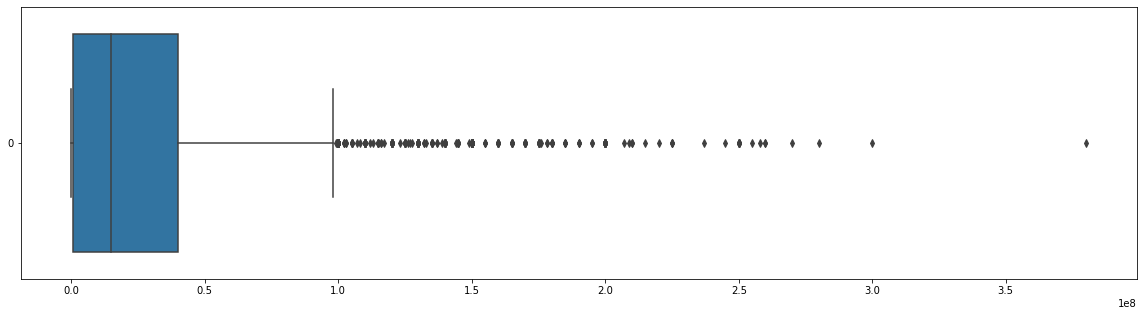

In [117]:
#PLOT A BOX PLOT OF THE BUDGET DATA
plt.figure(figsize = (20,5))
sns.boxplot(data = df2['budget'],
           orient = 'h')
plt.show()

In [116]:
#CALCULATING THE MEDIAN OF THE BUDGET VALUES
df2['budget'].median()

15000000.0

This looks wierd. Why is the **median** **15 million** (15000000) when we have so many values above **100 million** (100000000)?

In [114]:
#CALCULATING THE COUNT OF BUDGETS BELOW AND ABOVE 100 MILLION
below = df2[df2['budget']<100000000]
above = df2[df2['budget']>=100000000]

print(f'Below 100 Million: {len(below)} \n100 million and above: {len(above)}')

Below 100 Million: 4482 
100 million and above: 320


The nature of movie budgets means they are quite spread, from independent films to blockbusters. So this makes sense.

The same logic applies for revenue.

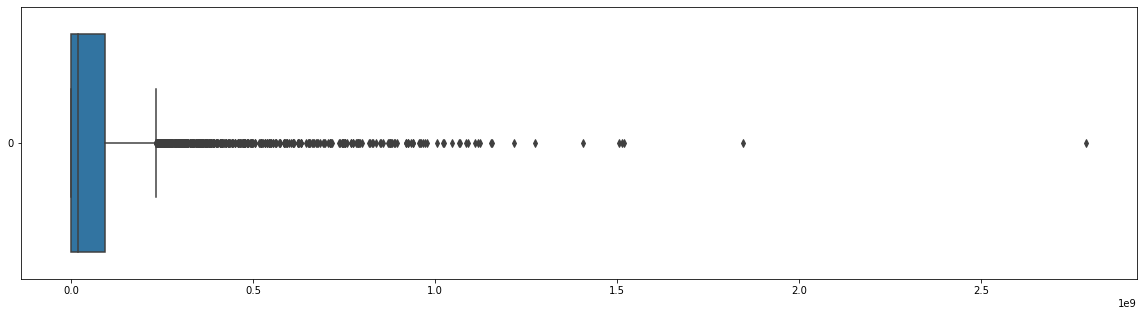

In [118]:
#PLOT A BOX PLOT OF THE REVENUE DATA
plt.figure(figsize = (20,5))
sns.boxplot(data = df2['revenue'],
           orient = 'h')
plt.show()

In [123]:
#CALCULATING THE MEDIAN OF THE REVENUE VALUES
df2['revenue'].median()

19174985.0

In [124]:
#CALCULATING THE COUNT OF REVENUES BELOW AND ABOVE 100 MILLION
below = df2[df2['revenue']<500000000]
above = df2[df2['revenue']>=500000000]

print(f'Below 0.5 Billion: {len(below)} \n0.5 Billion and above: {len(above)}')

Below 0.5 Billion: 4656 
0.5 Billion and above: 146


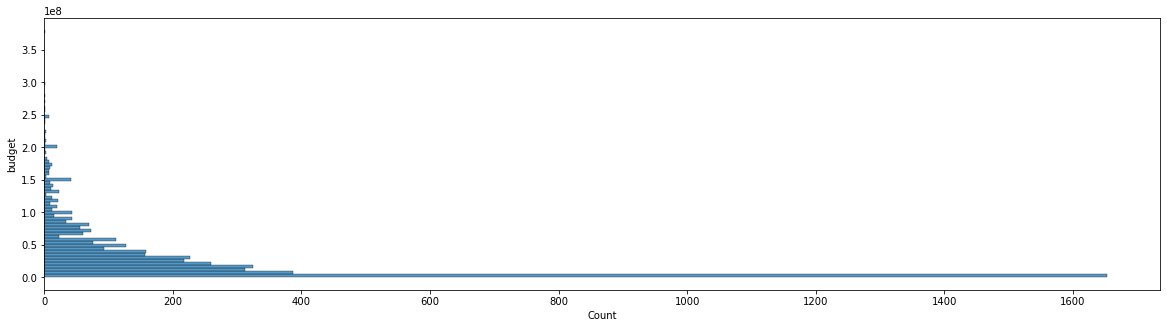

Mean: 0    0
dtype: int64


In [136]:
#VARIANCE IN BUDGETS AND REVENUE OF FILMS WITHIN THE DATA
plt.figure(figsize = (20,5))
sns.histplot(data=df2, y='budget')
plt.show()
print(f"Mean: {df2['budget'].mode()}")

In [145]:
#COUNT OF MOVIES WITH NO BUDGET
len(df2[df2['budget']==0])

1036

**A large proportion of our budget entries are equal to 0!**

In [190]:
#MOVIES WITH NO BUDGET
df2[df2['budget']==0].head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
265,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 14, ""nam...",NaN,10588,"[{""id"": 977, ""name"": ""cat""}, {""id"": 1155, ""nam...",en,The Cat in the Hat,Conrad and Sally Walden are home alone with th...,18.251129,"[{""name"": ""Imagine Entertainment"", ""id"": 23}, ...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2003-11-21,0,82.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Don't mess with the hat.,The Cat in the Hat,4.9,366
321,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,77953,"[{""id"": 6078, ""name"": ""politics""}, {""id"": 6083...",en,The Campaign,Two rival politicians compete to win an electi...,16.460356,"[{""name"": ""Everyman Pictures"", ""id"": 2242}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-08-09,104907746,85.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,May The Best Loser Win.,The Campaign,5.6,578
359,0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 16, ""...",http://www.foxmovies.com/movies/alvin-and-the-...,258509,"[{""id"": 10986, ""name"": ""chipmunk""}, {""id"": 109...",en,Alvin and the Chipmunks: The Road Chip,"Through a series of misunderstandings, Alvin, ...",27.867368,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-12-17,233755553,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Fast & furry-ous,Alvin and the Chipmunks: The Road Chip,5.8,428
406,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 16, ""name...",http://www.arthurchristmas.com/,51052,"[{""id"": 65, ""name"": ""holiday""}, {""id"": 1991, ""...",en,Arthur Christmas,"Each Christmas, Santa and his vast army of hig...",19.836830,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2011-02-22,0,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Ever wonder how 2 Billion presents get deliver...,Arthur Christmas,6.7,333
409,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10402, ""n...",NaN,16858,"[{""id"": 837, ""name"": ""show business""}, {""id"": ...",en,All That Jazz,Bob Fosse's semi-autobiographical film celebra...,5.159407,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1979-12-20,37823676,123.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,All that work. All that glitter. All that pain...,All That Jazz,7.3,85


**This doesn't make sense.**
- Arthur Christmas, Alvin and the Chipmunks and The Cat in the Hat are all **major grossing films with large budgets.**
    - **Sources:** 
    - **1.** https://www.imdb.com/title/tt0312528/, 
    - **2.** https://www.imdb.com/title/tt2974918/?ref_=nv_sr_srsg_7_tt_8_nm_0_q_alvin%2520and%2520, 
    - **3.** https://www.imdb.com/title/tt1430607/?ref_=nv_sr_srsg_0_tt_7_nm_1_q_arthur%2520christmas

**What happens if we remove 0 values and plot again?**
- Mainly the same, still a large spread of data.

**Revenue No Zeros**

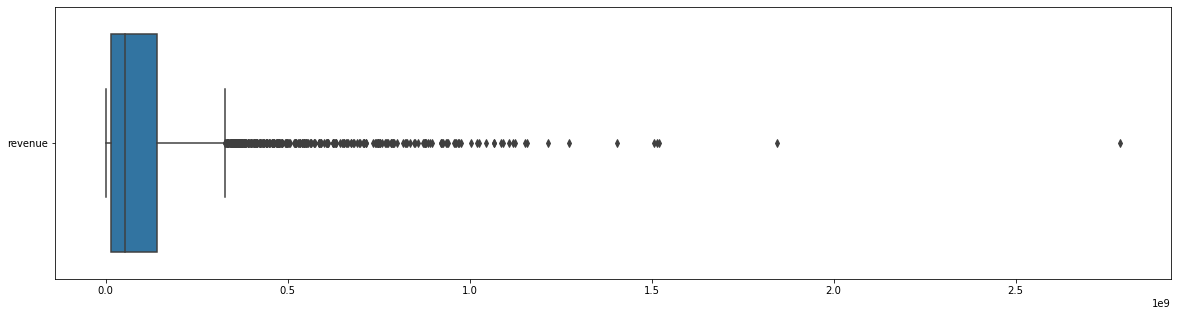

In [196]:
plt.figure(figsize = (20,5))
sns.boxplot(data = df2[(df2['revenue']!=0)][['revenue']],
           orient = 'h')
plt.show()

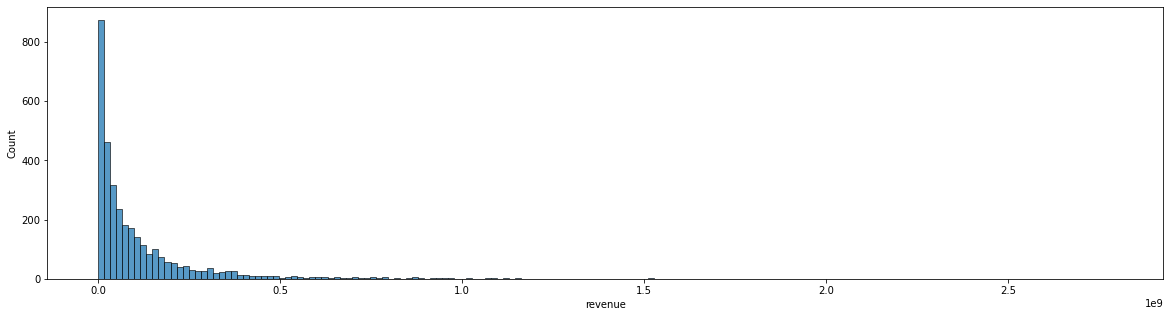

Mode: 0    0
dtype: int64


In [207]:
plt.figure(figsize = (20,5))
sns.histplot(data=df2[(df2['revenue']>0)], x='revenue')
plt.show()
print(f"Mode: {df2['budget'].mode()}")

**Budget No Zeros**

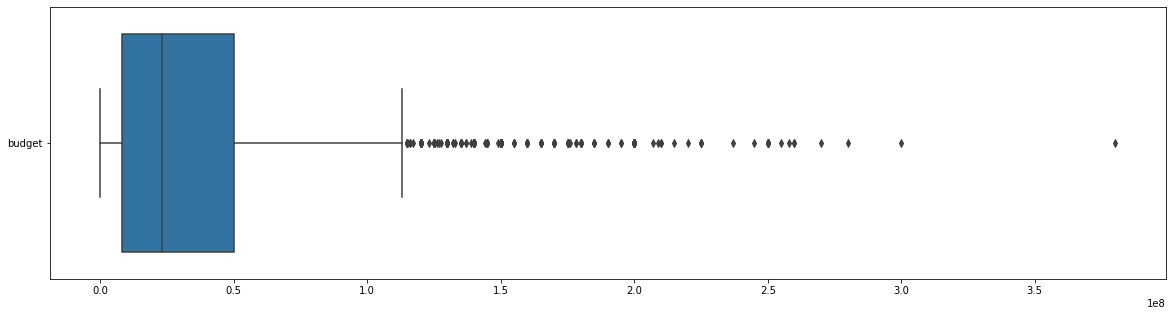

In [202]:
#PLOT A BOX PLOT OF THE BUDGET DATA
plt.figure(figsize = (20,5))
sns.boxplot(data = df2[(df2['budget']!=0)][['budget']],
           orient = 'h')
plt.show()

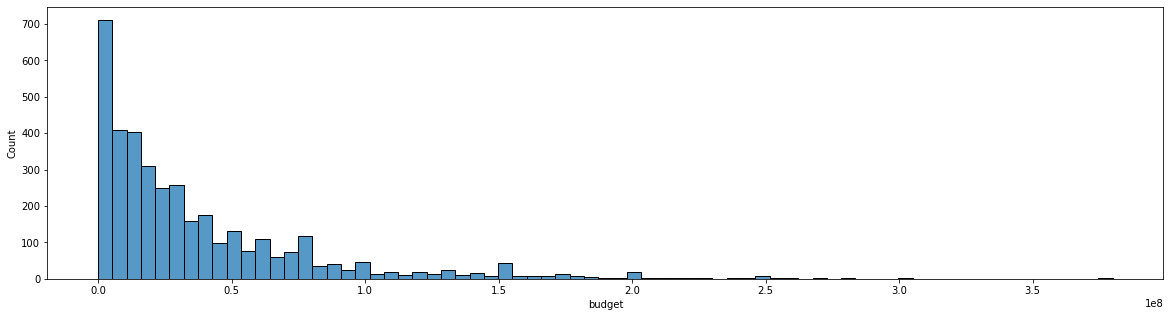

Mean: 0    0
dtype: int64


In [208]:
#VARIANCE IN BUDGETS AND REVENUE OF FILMS WITHIN THE DATA
plt.figure(figsize = (20,5))
sns.histplot(data=df2[(df2['budget']>0)], x='budget')
plt.show()
print(f"Mean: {df2['budget'].mode()}")

In [211]:
#STD DEV OF BUDGET AND REVENUE
df2[(df2['budget']>0) & (df2['revenue']>0)][['budget','revenue']].std()

budget     4.439674e+07
revenue    1.863029e+08
dtype: float64

In [210]:
#MEAN OF BUDGET AND REVENUE
df2[(df2['budget']>0) & (df2['revenue']>0)][['budget','revenue']].mean()

budget     4.065444e+07
revenue    1.212430e+08
dtype: float64

In [225]:
## Function to extract genres for each datapoint
# Source: Alex Caian
def extract_genres(x): 
    x = ast.literal_eval(x) ## Transform '['name', 'id']' back into ['name', 'id']
    Genres = [] ## Empty list to store the genres
    
    ''' Iterate through each dictionary '''
    for item in x: ## iterate for each dictionary in our list
        Genres.append(item['name']) ## Grab the 'name' key for each dictionary
        
    ''' Return the Genres'''
    return Genres

In [237]:
#APPLYING THE FUNCTION for genres
# issue - instead of string nulls we have actual nulls, this need string nulls.
df2['extracted_genres'] = df['genres'].apply(extract_genres)

In [238]:
#APPLYING THE FUNCTION for countries
df2['extracted_countries'] = df['production_countries'].apply(extract_genres)

In [240]:
#CHECKING THE NEW DATASET 
df2[['extracted_genres','extracted_countries']].head()

,extracted_genres,extracted_countries
0,"[Action, Adventure, Fantasy, Science Fiction]","[United States of America, United Kingdom]"
1,"[Adventure, Fantasy, Action]",[United States of America]
2,"[Action, Adventure, Crime]","[United Kingdom, United States of America]"
3,"[Action, Crime, Drama, Thriller]",[United States of America]
4,"[Action, Adventure, Science Fiction]",[United States of America]


In [241]:
#CHECKING DATA TYPES IN THE NEW COLUMNS
type(df2['extracted_genres'][0])

list

## ----Exploration and Visualisation----

### Action: Making Genres and Keywords More Accessible for Visualisation

##### <span style = "color:#0C7BDC"> **Code** </span>

In [246]:
## Function to extract genres for each datapoint
# Source: Alex Caian
def extract_genres(x): 
    x = ast.literal_eval(x) ## Transform '['name', 'id']' back into ['name', 'id']
    Genres = [] ## Empty list to store the genres
    
    ''' Iterate through each dictionary '''
    for item in x: ## iterate for each dictionary in our list
        Genres.append(item['name']) ## Grab the 'name' key for each dictionary
        
    ''' Return the Genres'''
    return Genres

In [247]:
#APPLYING THE FUNCTION for genres
# issue - instead of string nulls we have actual nulls, this need string nulls.
df2['extracted_genres'] = df['genres'].apply(extract_genres)

In [248]:
#APPLYING THE FUNCTION for countries
df2['extracted_countries'] = df['production_countries'].apply(extract_genres)

In [249]:
#CHECKING THE NEW DATASET 
df2[['extracted_genres','extracted_countries']].head()

,extracted_genres,extracted_countries
0,"[Action, Adventure, Fantasy, Science Fiction]","[United States of America, United Kingdom]"
1,"[Adventure, Fantasy, Action]",[United States of America]
2,"[Action, Adventure, Crime]","[United Kingdom, United States of America]"
3,"[Action, Crime, Drama, Thriller]",[United States of America]
4,"[Action, Adventure, Science Fiction]",[United States of America]


### Analysis: Best Performing Regions

#### <span style = "color:#E66100"> **Insights** </span>

- The **US** grosses more than **3 times** the revenue of it's closest competitor (the UK).
    - ~ 350000000000 or 350 billion (likely USD $).
- Most **revenues** are appropriately aligned with associated **budgets**.
    - With a positive correlation of **0.73**.

##### <span style = "color:#0C7BDC"> **Code** </span>

In [273]:
#source: chatgpt

def get_unique(df, column_name):
    '''
    For a column containing a list of values, 
    this will collect all of the unique values for 
    that column by extracting each item in each list and return them as a set.
    '''
    # Initialize an empty set to store unique countries
    unique = set()
    
    # Iterate through each list in the specified column
    for data_list in df[column_name]:
        # Update the set with countries from the current list
        unique.update(data_list)
    
    return unique

In [274]:
#GATHER UNIQUE COUNTRIES IN THE DATASET
unique_countries = get_unique(df2,'extracted_countries')
# unique_countries

In [276]:
#EXPLODE THE DATA SO THAT MULTI-COUNTRY DATA HAS A ROW REPRESENTING EACH COUNTRY IT APPLIES TO
df_exploded = df2.explode('extracted_countries')
df_exploded = df_exploded.rename(columns={'extracted_countries':'country'})

In [277]:
#Group countries by total revenue
revenue_per_country = df_exploded.groupby('country')['revenue'].sum().reset_index()

In [279]:
#GRAB THE TOP 15 GROSSING Countries BY REVENUE
top_countries = revenue_per_country.sort_values(by='revenue', ascending=False).head(15)

In [291]:
#Sort the top 15 countries in ascending order so that they display smallest to largest in a barplot
top_countries.sort_values(by='revenue',ascending=True,inplace=True)

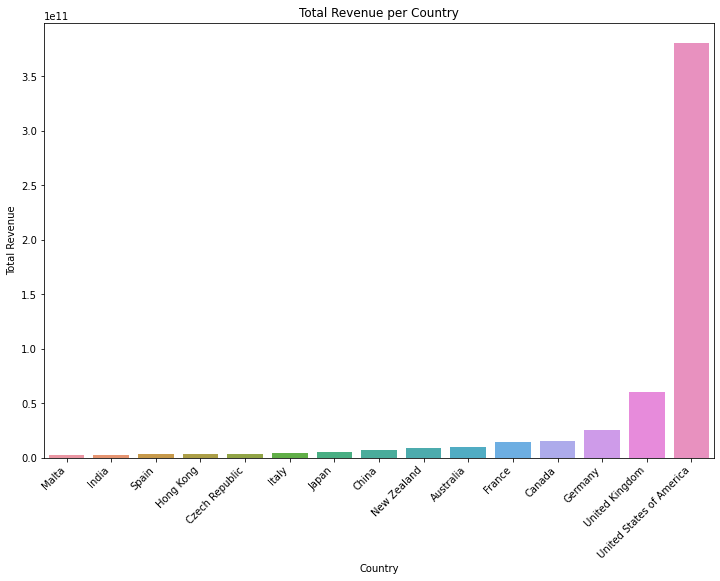

In [292]:
#generate a viewing window in the notebook for a plot
plt.figure(figsize=(12, 8))
#generate a bar plot of revenue per country
sns.barplot(x='country', y='revenue', data=top_countries)
#title
plt.title('Total Revenue per Country')
#x axis label
plt.xlabel('Country')
#y axis label
plt.ylabel('Total Revenue')
#orient country labels so that they look good
plt.xticks(rotation=45,ha='right')
#display the barplot
plt.show()

In [307]:
#Group countries by total budget
budget_per_country = df_exploded.groupby('country')['budget'].sum().reset_index()
#grab the top 15 highest spending countries by budget
top_spending_countries = budget_per_country.sort_values(by='budget', ascending=False).head(15)
#sort the top 15 countries in ascending order so that they display smallest to largest in a plot
top_spending_countries.sort_values(by='budget',ascending=True,inplace=True)

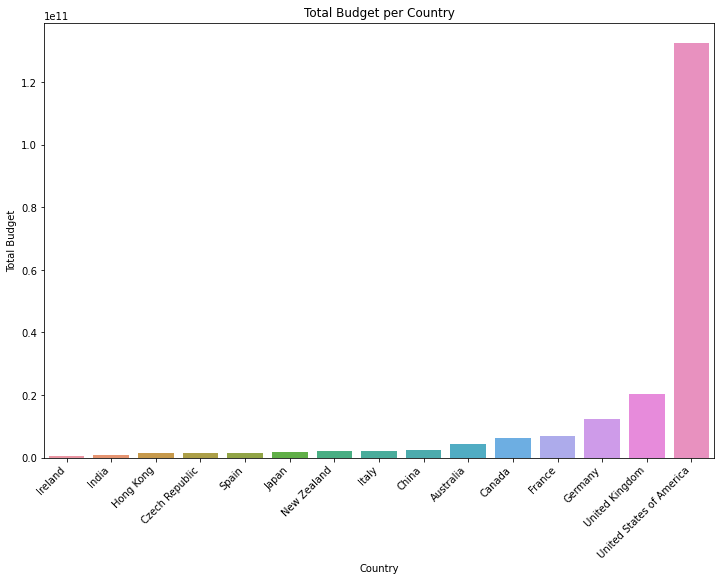

In [309]:
#generate a viewing window in the notebook for a plot
plt.figure(figsize=(12, 8))
#generate a bar plot of budget per country
sns.barplot(x='country', y='budget', data=top_spending_countries)
#title
plt.title('Total Budget per Country')
#x axis label
plt.xlabel('Country')
#y axis label
plt.ylabel('Total Budget')
#orient country labels so that they look good
plt.xticks(rotation=45,ha='right')
#display the barplot
plt.show()

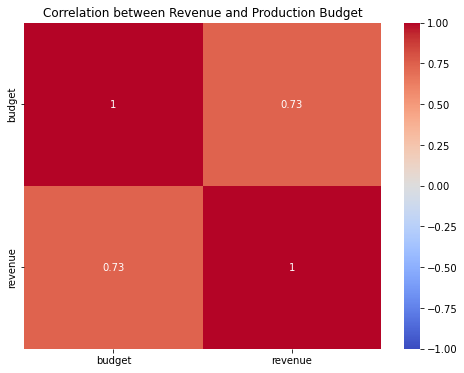

In [310]:
##source: chatgpt

#generate a subset dataframe only containing values for budget and revenue
columns_of_interest = ['budget', 'revenue']
subset_df = df_exploded[columns_of_interest]

# Calculate correlation between budget and revenue data
correlation = subset_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Revenue and Production Budget')
plt.show()

### Analysis: Best Performing Genre

#### <span style = "color:#E66100"> **Insights** </span>

- <u>**Adventure**</u> is the best performing Genre, **grossing:** 
    - **\$ 164841561551**
- <u>**Action**</u> is the highest costing genre, with a **total expenditure of:**
    - **\$ 5944340699**

##### <span style = "color:#0C7BDC"> **Code** </span>

In [284]:
#EXPLODE THE DATA SO THAT MULTI-GENRE DATA HAS A ROW REPRESENTING EACH GENRE IT APPLIES TO
df_exploded_genres = df2.explode('extracted_genres')
df_exploded_genres = df_exploded_genres.rename(columns={'extracted_genres':'genre'})

In [285]:
#GENERATE A NEW DATAFRAME WITH THE SUM OF REVENUE FOR EACH GENRE
revenue_per_genre = df_exploded_genres.groupby('genre')['revenue'].sum().reset_index()

In [286]:
#GRAB THE TOP 15 GROSSING GENRES BY REVENUE
top_genres = revenue_per_genre.sort_values(by='revenue', ascending=False).head(15)

In [289]:
#SORT THE TOP 15 IN ASCENDING ORDER TO DISPLAY SMALLEST TO LARGEST IN THE BARPLOT
top_genres.sort_values(by='revenue',ascending=True,inplace=True)

In [4]:
#Generate a window to display bar plot
plt.figure(figsize=(12, 8))
#Generate a bar plot of revenue per genre
sns.barplot(x='genre', y='revenue', data=top_genres)
#Title
plt.title('Total Revenue per Genre')
#X axis label
plt.xlabel('Genre')
#Y axis label
plt.ylabel('Total Revenue')
#Set the genre labels so that they fit neatly in the plot
plt.xticks(rotation=45,ha='right')
#display the barplot
plt.show()

NameError: name 'top_genres' is not defined

<Figure size 864x576 with 0 Axes>

In [305]:
#GENERATE A NEW DATAFRAME WITH THE SUM OF budgets FOR EACH GENRE
budget_per_genre = df_exploded_genres.groupby('genre')['budget'].sum().reset_index()
#GRAB THE TOP 15 spending GENRES BY budget
top_spending_genres = budget_per_genre.sort_values(by='budget', ascending=False).head(15)
#Sort the top 15 genres in ascending order to display smallest to largest in the barplot
## This makes comparison between the two barplots easier.
top_spending_genres.sort_values(by='budget',ascending=True,inplace=True)

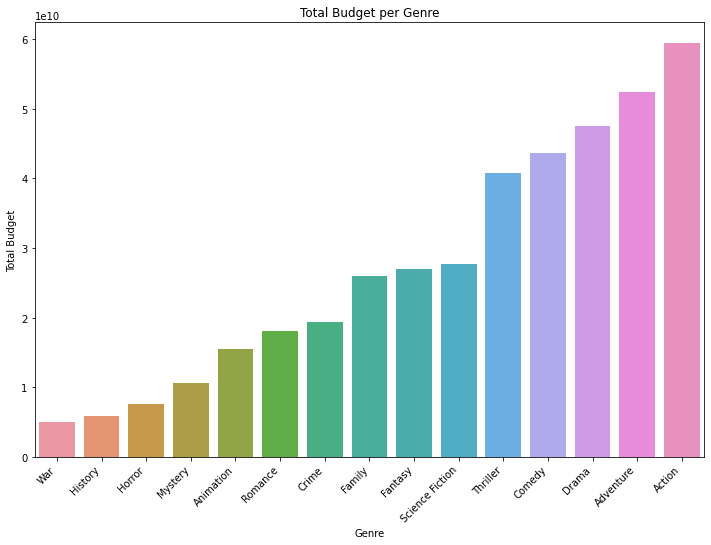

In [306]:
#Generate a window to display bar plot
plt.figure(figsize=(12, 8))
#Generate a bar plot of budget per genre
sns.barplot(x='genre', y='budget', data=top_spending_genres)
#Title
plt.title('Total Budget per Genre')
#X axis label
plt.xlabel('Genre')
#Y axis label
plt.ylabel('Total Budget')
#Set the genre labels so that they fit neatly in the plot
plt.xticks(rotation=45,ha='right')
#display the barplot
plt.show()

### Analysis: Popularity vs Voting Data Correlation

#### <span style = "color:#E66100"> **Insights** </span>

- A **weak positive correlation** (0.27) was identified between data in the **popularity** column and the **vote average**.
    - This was surprising as popularity would intuitively be reflected in by vote/rating.
    - Potentially vote has another meaning than the assumed meaning of 1-10 rating.
    - Or popularity is calculated using something other than the rating of a given film.
        - **I wonder what this is?**

##### <span style = "color:#0C7BDC"> **Code** </span>

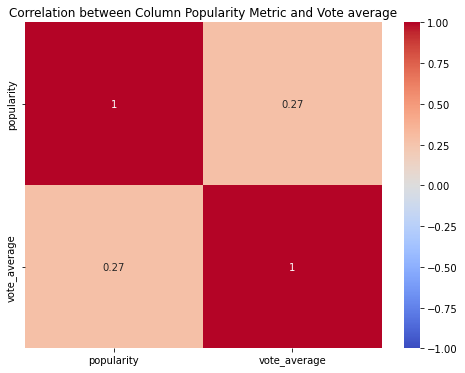

In [259]:
##SOURCE: chatgpt

columns_of_interest = ['popularity', 'vote_average']
subset_df = df2[columns_of_interest]

# Calculate correlation
correlation = subset_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Column Popularity Metric and Vote average')
plt.show()